In [ ]:
import numpy as np
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import random
import math
import seaborn as sns
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.preprocessing import label_binarize
np.random.seed(0)

In [ ]:
df = pd.read_csv('wheat-seeds.csv') # since the file that was downloaded does not have some lables on the features so I label them first then use it here

In [ ]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
df.isna().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64

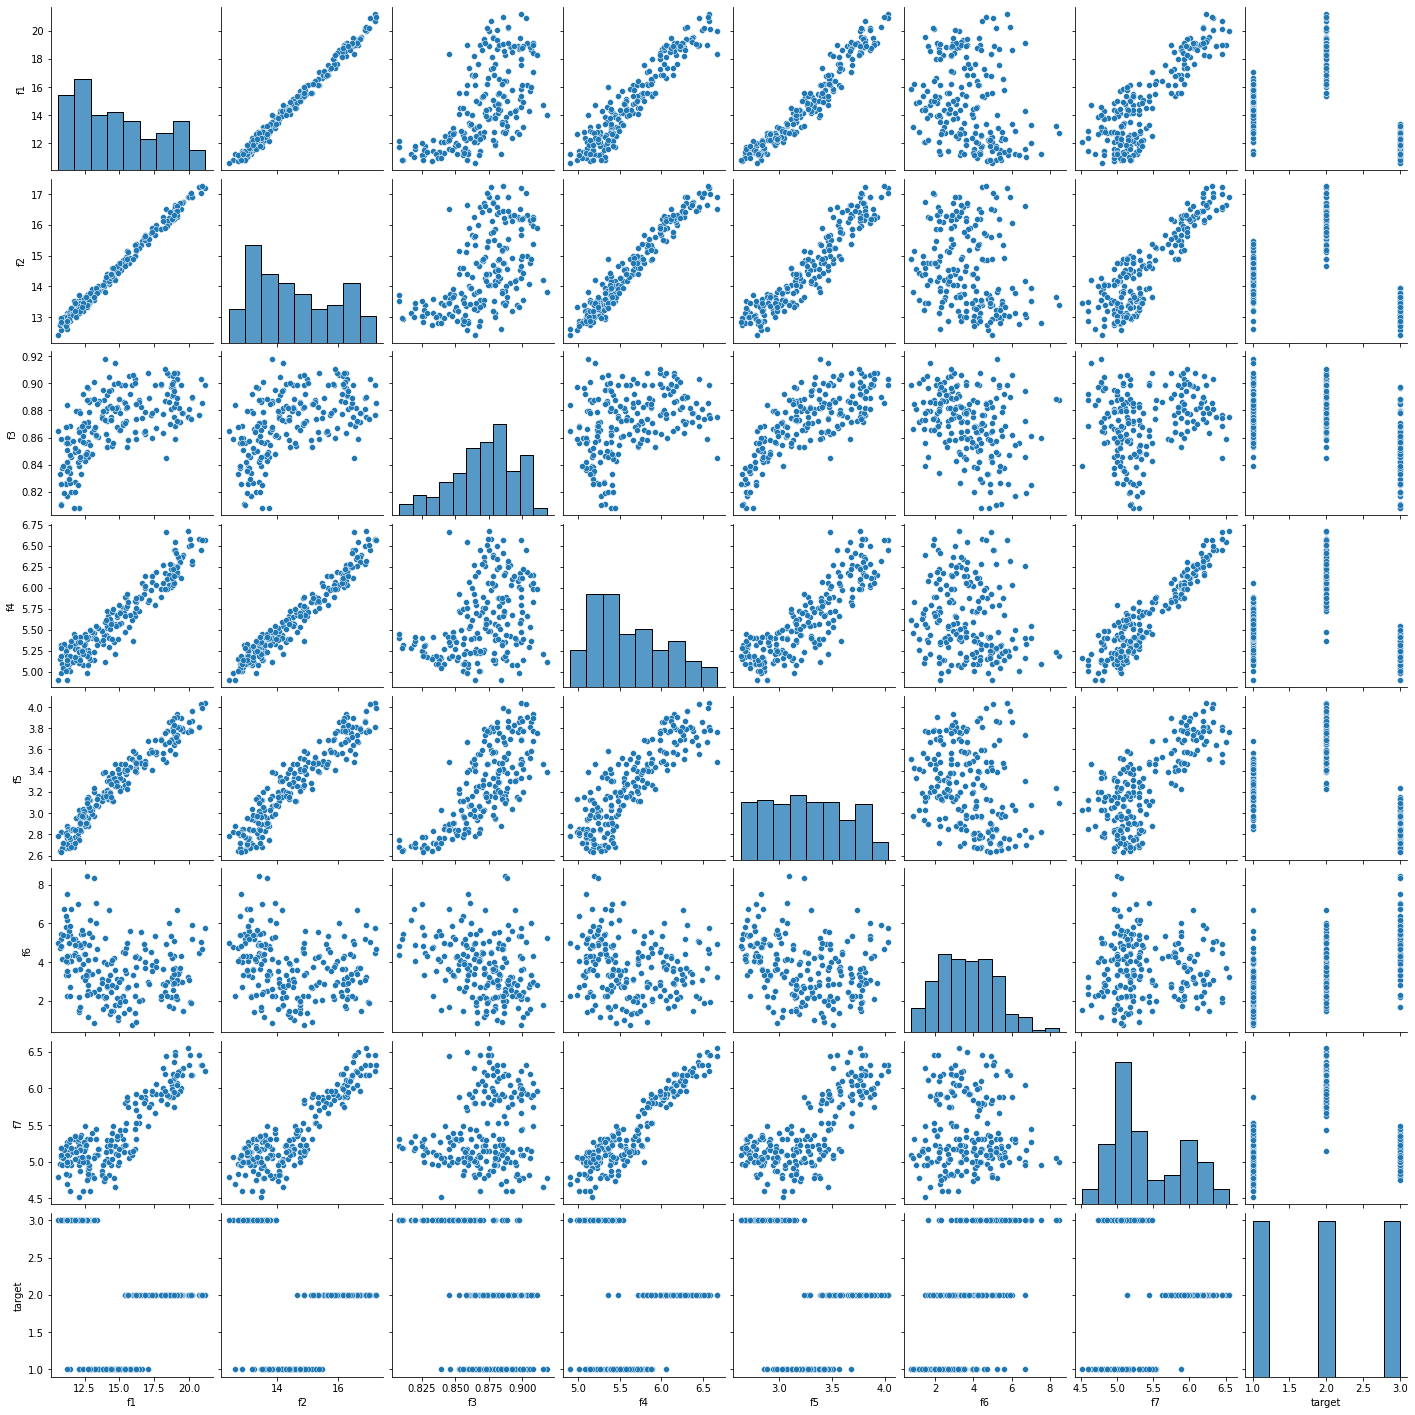

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


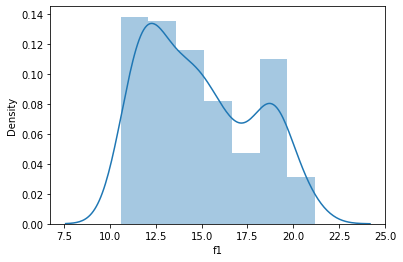

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


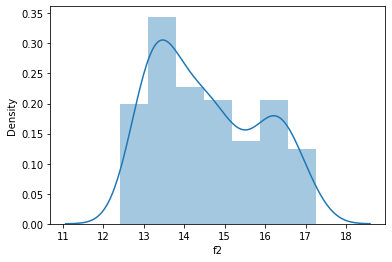

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


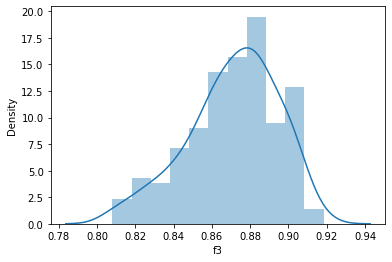

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


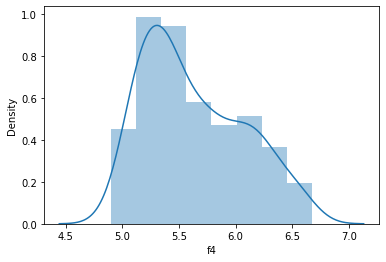

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


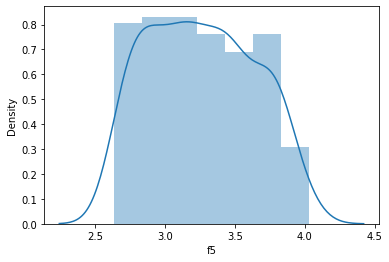

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


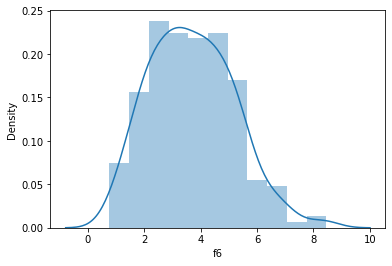

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


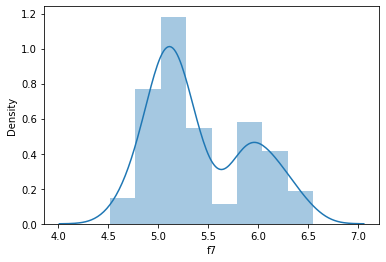

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


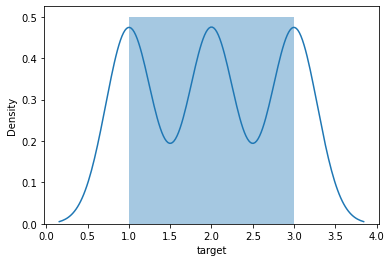

In [ ]:
for i in df.keys():
  sns.distplot(df.loc[:,i])
  plt.show()

In [ ]:
np.unique(df.target,return_counts=True)

(array([1, 2, 3]), array([70, 70, 70]))

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print((x.shape,y.shape))

((210, 7), (210,))


In [ ]:
for col in range(len(x.keys())): # z normalizing the given data before building the model as the normalizing playes a great role in data preprocessing
  x.iloc[:,col] = (x.iloc[:,col]-x.iloc[:,col].mean())/x.iloc[:,col].std()
x.head()

,f1,f2,f3,f4,f5,f6,f7
0,0.141759,0.214949,0.000060,0.303493,0.141364,-0.983801,-0.382663
1,0.011161,0.008204,0.427494,-0.168223,0.196962,-1.783904,-0.919816
2,-0.191609,-0.359342,1.438945,-0.761817,0.207552,-0.665888,-1.186357
3,-0.346264,-0.474200,1.036904,-0.687336,0.318747,-0.958528,-1.227051
4,0.444196,0.329807,1.371233,0.066507,0.803240,-1.559768,-0.474223


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


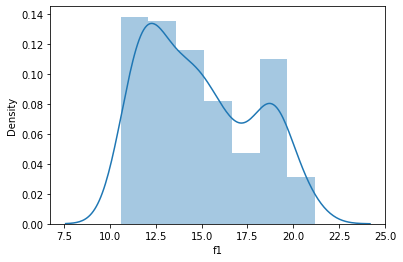

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


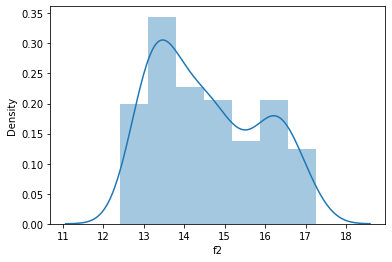

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


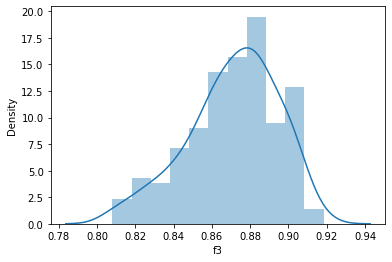

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


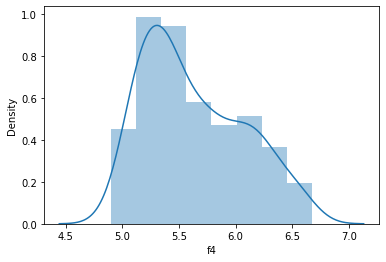

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


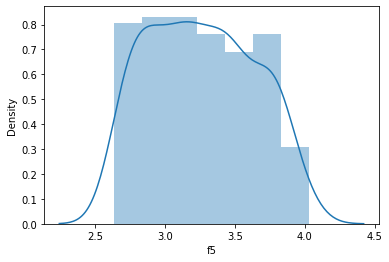

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


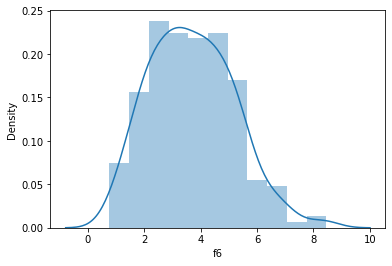

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


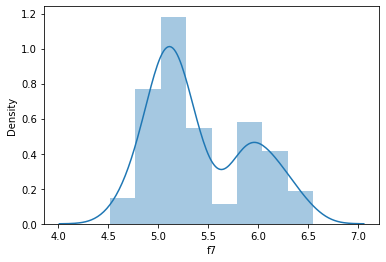

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


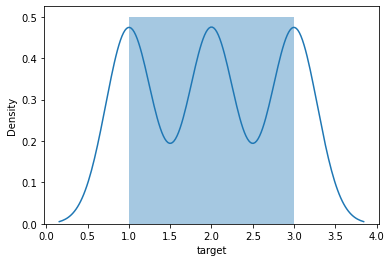

In [ ]:
for i in df.keys():#after normalizing the distribution
  sns.distplot(df.loc[:,i])
  plt.show()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=20)
x_train = x_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
x_test = x_test.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)
x_train

,f1,f2,f3,f4,f5,f6,f7
0,-1.315436,-1.193978,-2.204818,-0.685079,-1.476260,2.018413,-0.498639
1,-0.088505,-0.213855,1.197720,-0.626396,0.196962,0.322435,-1.275883
2,-0.253471,-0.351685,0.850695,-0.470662,0.114889,-0.665223,-0.830290
3,0.062713,0.161348,-0.220004,0.165815,-0.123386,-1.175347,0.062929
4,1.361816,1.325244,0.829535,1.452313,1.150063,-0.308070,1.312216
...,...,...,...,...,...,...,...
185,-0.287839,-0.206198,-0.359661,-0.044087,-0.266351,-0.986461,-0.561714
186,-1.023310,-1.178663,0.359782,-1.120682,-0.809089,-0.068638,-0.561714
187,1.478667,1.447760,0.761823,1.391373,1.473058,-0.409829,1.580792
188,0.048966,0.000547,0.732199,-0.132110,0.313452,-0.493630,-0.474223


In [ ]:
# MLP classifier from scratch 

class Mlpclassifier():
  def __init__(self,x_train , y_train , lr= 0.01,hidden = 5,n_epocs = 100,show=False):
    self.lister = []
    self.xt = x_train
    self.yt = y_train
    self.m = x_train.shape[0]
    self.inp = x_train.shape[1]
    self.output_layer = len(y_train.unique())
    self.lr = lr
    self.show = show
    self.epoch = n_epocs
    self.net = [[{'wt':np.random.random(self.inp+1)} for i in range(hidden)],[{'wt':np.random.random(hidden+1)} for i in range(self.output_layer)] ]
   
  def forward_pass(self, inputt):#assuming input is a numpy array 
    inputt.append(1)
    inp = inputt
    for i in self.net:
      l = []
      for j in i:
        j['out'] = self.sigmoid(np.dot( j['wt'] , np.array(inp) ))
        l.append(j['out'])
      l.append(1)
      inp = l
    return inp[:-1]

  def back_prop(self,expect):
    for i in range(len(self.net)-1,-1,-1):
      err = []
      if (i == len(self.net)-1):
        err.extend([expect[j] - self.net[i][j]['out'] for j in range(len(self.net[i]))])
      else:
        for j in range(len(self.net[i])):
          err.append(np.sum( np.array([nrn['wt'][j]*nrn['del'] for nrn in self.net[i+1]]),axis=0))
      for k in range(len(self.net[i])):
        self.net[i][k]['del'] = err[k] * self.derivative(self.net[i][k]['out'])
      
  def update_wt(self,inp):
    for i in range(len(self.net)):
      if(i!=0):
        inp = [nrn['out'] for nrn in self.net[i-1]]
      for nrn in self.net[i]:
        for j in range(len(inp)):
          nrn['wt'][j] += self.lr*nrn['del']*inp[j]
        nrn['wt'][-1] += self.lr * nrn['del']
    
  def fit(self):
    for i in range(self.epoch):
      loss = 0
      for inp in range(len(self.xt)):
        inpt = list(self.xt.iloc[inp,:])
        expect = [0 for i in range(3)]
        expect[int(self.yt[inp])-1] = 1
        out1 = self.forward_pass(inpt)
        loss += np.sum(np.square( np.array(expect) -np.array(out1)))
        self.back_prop(expect)
        self.update_wt(inpt)
      self.lister.append((i,loss))
      if(self.show):
        print(f'epoch = {i} error = {loss}')
        


  def get_layers_wt(self):
    l1 = []
    l2 = []
    for i in self.net[0]:
      l1.append(i['wt'])
    for i in self.net[1]:
      l2.append(i['wt'])
    return l1,l2


  def predict(self,x_test):  
    pred = []
    w1,w2 = self.get_layers_wt()
    for i in range(len(x_test)):
      a = list(x_test.iloc[i,:])
      a.append(1)
      inpt = np.array(a)
      t = []
      for j in w1:
        t.append(np.dot(j,inpt))
      t.append(1)
      final_out = []
      for k in w2:
        final_out.append(np.dot(k,np.array(t)))

      pred.append(1+np.argmax(final_out))

    return np.array(pred)      
    

  def accuracy(self,a,y_test):
    return np.sum(a == np.array(y_test))/len(y_test)
  def derivative(self,output):
    return output * (1 - output)
  def sigmoid(self,a):
    return 1/(1+np.exp(-a))
  

    

In [ ]:
clsf = Mlpclassifier(x_train,y_train,lr = 0.5,n_epocs=500,show = True)
clsf.fit()


a = clsf.predict(x_test)
print(a)

print(clsf.accuracy(a,y_test))



epoch = 0 error = 100.55786973558264
epoch = 1 error = 58.6735958993604
epoch = 2 error = 37.051411239081425
epoch = 3 error = 28.225042097148243
epoch = 4 error = 24.819058130773495
epoch = 5 error = 22.97390615056033
epoch = 6 error = 21.683250743168102
epoch = 7 error = 20.65032313859157
epoch = 8 error = 19.788702211599812
epoch = 9 error = 19.069093350953665
epoch = 10 error = 18.465668448333798
epoch = 11 error = 17.952766102100497
epoch = 12 error = 17.509093169995836
epoch = 13 error = 17.118470958488547
epoch = 14 error = 16.768804792335953
epoch = 15 error = 16.450891994177677
epoch = 16 error = 16.15753652604654
epoch = 17 error = 15.882960289170052
epoch = 18 error = 15.622409899050782
epoch = 19 error = 15.371872334634334
epoch = 20 error = 15.127829583844537
epoch = 21 error = 14.886984597107002
epoch = 22 error = 14.645891110860358
epoch = 23 error = 14.400456183334503
epoch = 24 error = 14.145449446810789
epoch = 25 error = 13.8745921375169
epoch = 26 error = 13.5823738

Text(0, 0.5, 'loss')

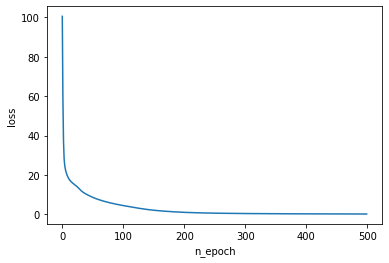

In [ ]:
lis = clsf.lister
lis1 = list(map(lambda x : x[0],lis))
lis2 = list(map(lambda x : x[1],lis))
plt.plot(lis1,lis2)
plt.xlabel('n_epoch')
plt.ylabel('loss')

In [ ]:
confusion_matrix(y_test,a)

array([[8, 0, 0],
       [3, 4, 0],
       [1, 0, 4]])

In [ ]:
clf = MLPClassifier(activation = 'logistic')

In [ ]:
clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 2, 1, 1, 3, 2, 2, 2, 2, 3, 1, 3, 3, 3, 2, 2, 3, 2, 1, 1])

In [ ]:
clf.score(x_test,y_test)

0.9

In [ ]:
confusion_matrix(y_test,y_pred)

array([[6, 1, 1],
       [0, 7, 0],
       [0, 0, 5]])

In [ ]:
binar1 = label_binarize(np.array(y_test),classes = np.unique(y_test))
binar2 = label_binarize(a,classes = np.unique(y_test))
binar3 = label_binarize(np.array(y_pred),classes=np.unique(y_test))
n_classes = binar1.shape[1]
fpr12 = dict()
tpr12 = dict()
auc_12 = dict()
for i in range(n_classes):
  fpr12[i],tpr12[i] ,_ = roc_curve(binar1[:,i],binar2[:,i])
  auc_12[i] = auc(fpr12[i],tpr12[i])
fpr13 = dict()
tpr13 = dict()
auc_13 = dict()
for i in range(n_classes):
  fpr13[i],tpr13[i] ,_ = roc_curve(binar1[:,i],binar3[:,i])
  auc_13[i] = auc(fpr13[i],tpr13[i])

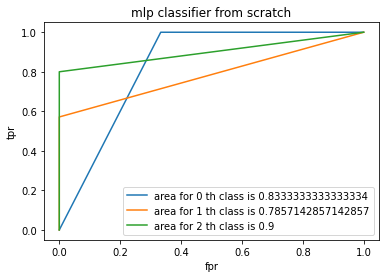

In [ ]:
for i in range(n_classes):
    plt.plot(fpr12[i],tpr12[i],label = f'area for {i} th class is {auc_12[i]}')
    plt.legend()
    plt.xlabel('fpr')
    plt.ylabel('tpr')
plt.title('mlp classifier from scratch')
plt.show()

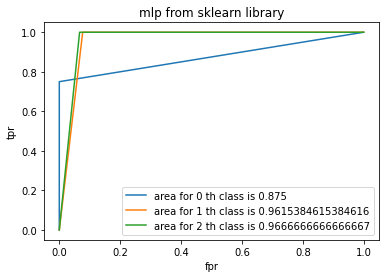

In [ ]:
for i in range(n_classes):
    plt.plot(fpr13[i],tpr13[i],label = f'area for {i} th class is {auc_13[i]}')
    plt.legend()
    plt.xlabel('fpr')
    plt.ylabel('tpr')
plt.title('mlp from sklearn library')
plt.show()